<font color=red><h1> MAD Portfolio Optimization</h1></font>

<font color=red><h1> 1. Loading data and packages</h1></font>

<font color=green><h2> 1.1 Loading packages</h2></font>

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
from datetime import timedelta, datetime
import matplotlib.pyplot as plt
import cvxpy as cp
import mplfinance as mpf
import plotly.graph_objs as go
import warnings
warnings.filterwarnings('ignore')


<font color=green><h2> 1.2 Loading Data</h2></font>

In [2]:
End_date=datetime.strptime('2019-01-01', '%Y-%m-%d').date()
Start_date=End_date-timedelta(days=5*365)
#Tickers=['AAPL','AMZN','NVDA','WMT','META','IBM','MSFT']
Tickers=['AAPL','AMZN','NVDA','WMT','META','MSFT','GOOGL','TSLA','JNJ','JPM','UNH','MA','V','PG']
Stocks=yf.download(Tickers,Start_date,End_date)

[*********************100%%**********************]  14 of 14 completed


In [3]:
Stocks_AdjClose=Stocks.loc[:,"Adj Close"]
Stocks_AdjClose.head()

Ticker,AAPL,AMZN,GOOGL,JNJ,JPM,MA,META,MSFT,NVDA,PG,TSLA,UNH,V,WMT
Date,,,,,,,,,,,,,,
2014-01-02,17.234301,19.898500,27.787050,67.750641,43.550617,78.087723,54.545769,31.120735,0.373992,58.940636,10.006667,63.254982,51.132057,21.054293
2014-01-03,16.855730,19.822001,27.584349,68.360916,43.887287,77.775970,54.396221,30.911356,0.369512,58.874748,9.970667,63.704548,51.166767,20.984919
2014-01-06,16.947651,19.681499,27.891897,68.718208,44.141678,77.390251,57.028294,30.258125,0.374464,59.013805,9.800000,62.975029,50.859066,20.867517
2014-01-07,16.826439,19.901501,28.429604,70.176964,43.632912,78.468285,57.746132,30.492620,0.380595,59.584633,9.957333,64.900589,51.247730,20.931557
2014-01-08,16.933006,20.096001,28.488766,70.080215,44.044395,78.444832,58.055206,29.948269,0.385782,58.721092,10.085333,64.145645,51.411995,20.766132


<font color=green><h2> 1.3 Calculating Returns</h2></font>

In [4]:
Returns=np.log(Stocks_AdjClose/Stocks_AdjClose.shift(1))
Returns.dropna(axis=0,inplace=True)
Returns.head()

Ticker,AAPL,AMZN,GOOGL,JNJ,JPM,MA,META,MSFT,NVDA,PG,TSLA,UNH,V,WMT
Date,,,,,,,,,,,,,,
2014-01-03,-0.022211,-0.003852,-0.007322,0.008967,0.007701,-0.004000,-0.002745,-0.006751,-0.012052,-0.001118,-0.003604,0.007082,0.000679,-0.003300
2014-01-06,0.005439,-0.007113,0.011088,0.005213,0.005780,-0.004972,0.047253,-0.021359,0.013312,0.002359,-0.017265,-0.011518,-0.006032,-0.005610
2014-01-07,-0.007178,0.011116,0.019095,0.021006,-0.011593,0.013834,0.012509,0.007720,0.016240,0.009626,0.015927,0.030118,0.007613,0.003064
2014-01-08,0.006313,0.009726,0.002079,-0.001380,0.009386,-0.000299,0.005338,-0.018013,0.013538,-0.014599,0.012773,-0.011700,0.003200,-0.007935
2014-01-09,-0.012852,-0.002267,-0.009677,0.006035,-0.001870,0.008046,-0.017497,-0.006453,-0.037999,0.002241,-0.025101,0.006065,-0.001396,0.003335


<font color=green><h2> 1.4 Mean return VS Mean absolute deviation</h2></font>

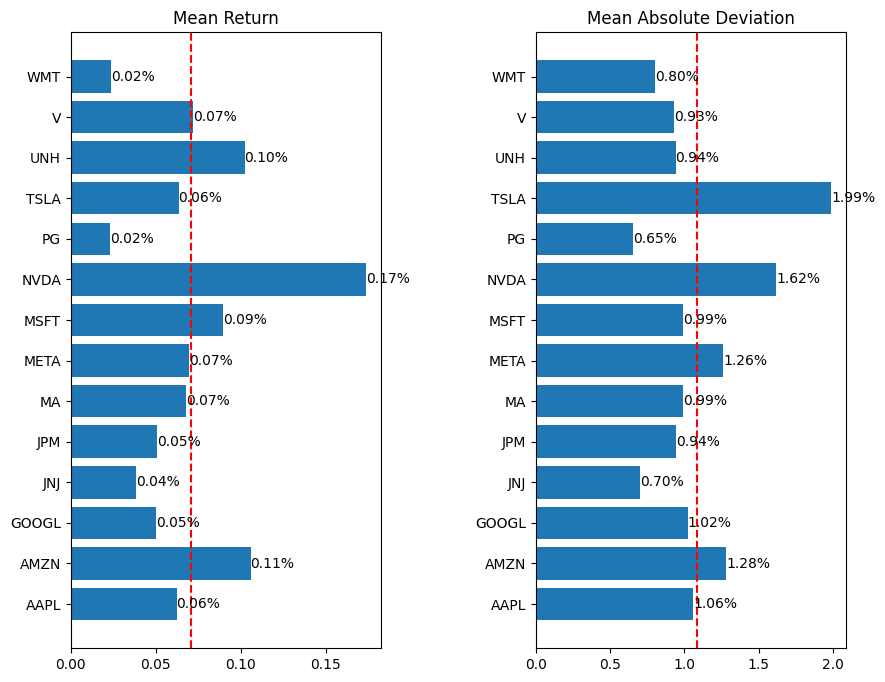

In [175]:
MAD=abs(Returns-Returns.mean()).mean()
MEAN=Returns.mean()
fig,ax=plt.subplots(1,2,figsize=(10,8))
ax[0].barh(MEAN.index,MEAN.values*100)
ax[0].axvline(x=MEAN.mean()*100, color='red', linestyle='--')
ax[0].set_title('Mean Return')
for i in range(Returns.shape[1]):
    val=Returns.mean()[i]*100
    ax[0].text(val,i,f'{val:.2f}%',ha='left',va='center')
ax[1].barh(MAD.index,MAD.values*100)
ax[1].axvline(x=MAD.mean()*100, color='red', linestyle='--')
ax[1].set_title('Mean Absolute Deviation')
for i in range(Returns.shape[1]):
    val=MAD[i]*100
    ax[1].text(val,i,f'{val:.2f}%',ha='left',va='center')

plt.subplots_adjust(wspace=0.5)

<font color=green><h2> 1.5 Efficient Frontier</h2></font>

<font color=orange><h2> 1.5.1 Calcultaion of optimal portfolios</h2></font>

![MAD Optimization](./MAD_1.jpg)

![MAD equivalent problem](./MAD_2.jpg)

In [ ]:
#Number of assets
N_Assets=Returns.shape[1]
#Number of scenarios
N_scenario=Returns.shape[0]
#Define the variable "Weights"
Weights=cp.Variable(N_Assets)
#Define the auxilary variable used to transform the MAD problem to a linear problem
Auxilary_varibale=cp.Variable(N_scenario)
#Define the function to minimize (the input is the auxilary variable)
MAD_function=cp.sum(Auxilary_varibale)/N_scenario
#Define the expected return of the portfolio
Mean_Portfolio_return=Returns.mean().values @ Weights
#Define the return of the portfolio at each scenario
Portfolio_return=Returns.values @ Weights

#List where to store the values 
L=[]
#List of possible returns of the portfolio
scen=np.linspace(min(Returns.mean()),max(Returns.mean()),500)
for i in scen:
    expected_return=i
    constraints=[cp.sum(Weights)==1,
             Weights>=0,
             Auxilary_varibale>=Portfolio_return-expected_return,
             Auxilary_varibale>=-Portfolio_return+ expected_return,
             Auxilary_varibale>=0,
             Mean_Portfolio_return>=expected_return]
    Problem=cp.Problem(cp.Minimize(MAD_function),constraints)
    p=Problem.solve()
    if Problem.status=='optimal':
        L.append((Problem.value,Mean_Portfolio_return.value))
L=np.array(L)    


<font color=orange><h2> 1.5.2 Visualisation</h2></font>

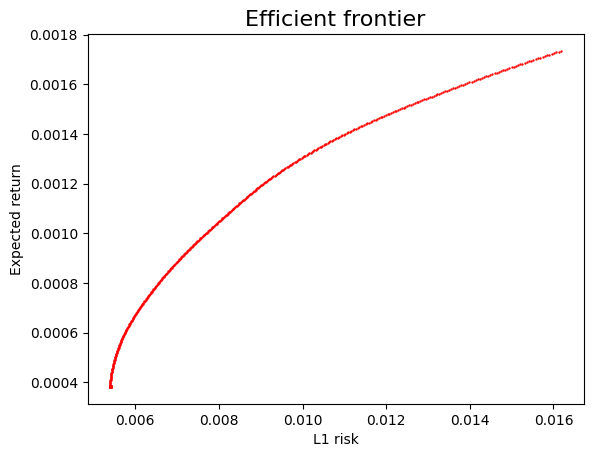

In [346]:
#plt.figure(figsize=(10, 6))
plt.scatter(L[:,0], L[:,1],c='r', s=0.5)
plt.xlabel('L1 risk')
plt.ylabel('Expected return')
plt.title('Efficient frontier', fontsize=16)
plt.show()

<font color=red><h1> Maximum Drawdown portfolio optimization</h1></font>

In [11]:
Colors=['blue','red','green','olive','purple','cyan','orange','magenta','lime','indigo','pink','brown','gray','teal']
Trace=list(np.ones(len(Tickers)))
for i in range(len(Tickers)):
  Trace[i] = go.Scatter(x=Stocks_AdjClose.index,y=Stocks_AdjClose.iloc[:,i],name=Stocks_AdjClose.columns[i],line=dict(color=Colors[i], width=2),marker=dict(size=2))

layout = go.Layout(xaxis = dict(title = 'Date'),yaxis = dict(title = 'Adj Close'),template = 'plotly_white' )

fig = go.Figure(data=Trace, layout=layout,)

fig.show()

<font color=green><h2> 1.1 Efficient Frontier</h2></font>

<font color=orange><h2> 1.2 Calcultaion of optimal portfolios</h2></font>

![MAD equivalent problem](./MDD1.jpg)

![MAD equivalent problem](./MDD2.jpg)

In [5]:
#Number of assets
N_Assets=Returns.shape[1]
#Number of scenarios
N_scenario=Returns.shape[0]
#Define the variable "Weights"
Weights=cp.Variable(N_Assets)
#Define the auxilary variable used to transform the MDD problem
Auxilary_varibale=cp.Variable(1)
#Define the function to minimize (the input is the auxilary variable)
MDD_function=-Auxilary_varibale
#Define the expected return of the portfolio
Mean_Portfolio_return=Returns.mean().values @ Weights
#Define the return of the portfolio at each scenario
Portfolio_return=Returns.values @ Weights

#List where to store the values 
M=[]
#List of possible returns of the portfolio
scen=np.linspace(min(Returns.mean()),max(Returns.mean()),1000)
for i in scen:
    expected_return=i
    constraints=[Auxilary_varibale<=Portfolio_return[i] for i in range(N_scenario)]+[cp.sum(Weights)==1,
             Weights>=0,
             Weights<=0.5,
             Mean_Portfolio_return>=expected_return]
    #constraints+=[Auxilary_varibale<=Portfolio_return[i] for i in range(len(Portfolio_return))]
    Problem=cp.Problem(cp.Minimize(MDD_function),constraints)
    p=Problem.solve()
    if Problem.status=='optimal':
        M.append((Problem.value,Mean_Portfolio_return.value))
M=np.array(M)    


<font color=orange><h2>1.3 Visualisation</h2></font>

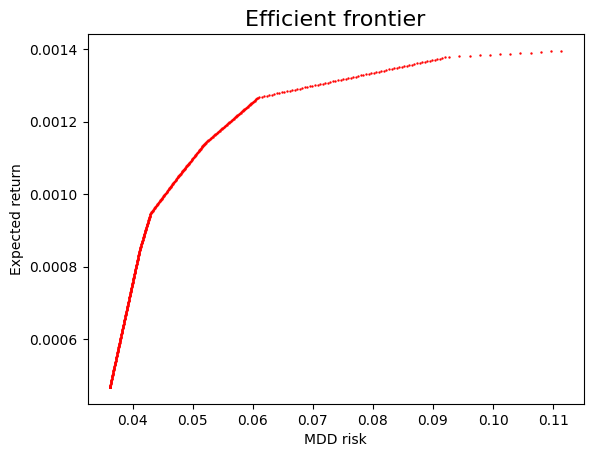

In [7]:
#plt.figure(figsize=(10, 6))
plt.scatter(M[:,0], M[:,1],c='r', s=0.5)
plt.xlabel('MDD risk')
plt.ylabel('Expected return')
plt.title('Efficient frontier', fontsize=16)
plt.show()